# Environment

In [109]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import json

# Function

In [110]:
def GetStat(genres, rating_range=(5,6)):
  films_selected = database[(database["genres"].str.contains(genres)) & \
                            (database["rating_average"] >= rating_range[0]) & \
                            (database["rating_average"] <= rating_range[1])]
  
  films_selected["count"] = films_selected["rating_details_1"] + \
                            films_selected["rating_details_2"] + \
                            films_selected["rating_details_3"] + \
                            films_selected["rating_details_4"] + \
                            films_selected["rating_details_5"]
  ratings = films_selected[["rating_details_%d" % i for i in range(1, 6)]].values
  np.nan_to_num(ratings)
  if ratings.sum() == 0:
    return []
  
  weights = ratings.sum(axis=1) + 1e-10
  ratings = ratings / weights[:, None]
  mean_rating = np.average(ratings, axis=0, weights=weights)
  mean_rating_squared = np.average(ratings ** 2, axis=0, weights=weights)
  std_rating = np.sqrt(mean_rating_squared - mean_rating ** 2)
  
  top_best = films_selected.nlargest(n=20, columns="count")

  return {"rating":{"count": weights.sum(),
                    "#films": films_selected.shape[0],
                    "1": mean_rating[0],
                    "1sd": std_rating[0],
                    "2": mean_rating[1],
                    "2sd": std_rating[1],
                    "3": mean_rating[2],
                    "3sd": std_rating[2],
                    "4": mean_rating[3],
                    "4sd": std_rating[3],
                    "5": mean_rating[4],
                    "5sd": std_rating[4],},
          "top_films": [{"film_id": row["film_id"],
                         "title": row["title"],
                         "rating_average": row["rating_average"]} for idx, row in top_best.iterrows()]}

In [111]:
def AllGenres(database):
  all_genres = {"":0}
  for genres_for_film in database.genres.values:
    if type(genres_for_film) is str:
      for genres in genres_for_film.split(":"):
        if genres not in all_genres:
          all_genres[genres] = 0
        all_genres[genres] += 1
        all_genres[""] += 1
  return all_genres

# Dev

# Run

In [112]:
database = pd.read_csv("data/films_rating_info.csv", dtype={"film_id" : object})

In [113]:
all_genres = AllGenres(database)

In [114]:
genres_sorted = sorted(all_genres.keys(), key=lambda x:-all_genres[x])
for x in genres_sorted:
  print(x)


剧情
喜剧
爱情
动作
惊悚
犯罪
动画
恐怖
科幻
冒险
悬疑
短片
奇幻
家庭
战争
传记
历史
同性
纪录片
音乐
歌舞
情色
运动
武侠
古装
西部
儿童
黑色电影
灾难
舞台艺术
戏曲
脱口秀
真人秀
鬼怪
Adult
惊栗
悬念
荒诞
Reality-TV
News
驚悚 Thriller
動畫 Animation
Game-Show


前0%~前10% 的电影评分在 8.3 至 9.8 之间
前10%~前20% 的电影评分在 7.9 至 8.3 之间
前20%~前30% 的电影评分在 7.6 至 7.9 之间
前30%~前40% 的电影评分在 7.4 至 7.6 之间
前40%~前50% 的电影评分在 7.1 至 7.4 之间
后40%~后50% 的电影评分在 6.7 至 7.1 之间
后30%~后40% 的电影评分在 6.4 至 6.7 之间
后20%~后30% 的电影评分在 5.9 至 6.4 之间
后10%~后20% 的电影评分在 5.1 至 5.9 之间
后0%~后10% 的电影评分在 2.1 至 5.1 之间


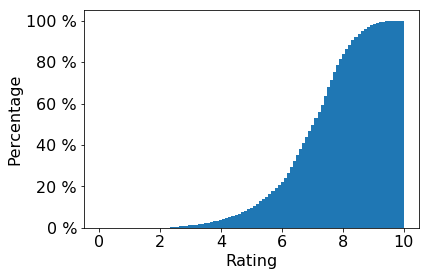

In [115]:
# Film list
with open("data/films.json", "rb") as f:
  film_list_raw = f.read()
film_list = []
for item in film_list_raw.split(b"\n"):
  try:
    json.loads(item)
    film_list.append(json.loads(item))
  except:
    pass

stars = [x["star"] for x in film_list]
stars.sort()
length = len(stars)

mpl.rcParams["font.size"] = 16
plt.figure(figsize=(6, 4))
ax = plt.subplot(111)
ax.hist(stars, bins=99, range=(0, 10), cumulative=True, density=True)
ax.set_xlabel("Rating")
ax.set_ylabel("Percentage")
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.set_yticklabels(["%d %%" % (i * 100) for i in np.arange(0, 1.1, 0.2)])

rating_percentile = []
for i in range(10):
  rating_percentile.append(stars[int(i / 10 * length)])
rating_percentile.append(stars[-1])

for i in range(9, -1,-1):
  if i >= 5:
    print("前%d%%~前%d%%" % (90 - i * 10, 100 - i * 10), "的电影评分在",
          rating_percentile[i], "至", rating_percentile[i+1], "之间")
  else:
    print("后%d%%~后%d%%" % (i * 10, 10 + i * 10), "的电影评分在",
          rating_percentile[i], "至", rating_percentile[i+1], "之间")

In [116]:
import tqdm
result = {}
for genres in tqdm.tqdm_notebook(all_genres):
  key = genres if genres is not "" else "全部"
  result[key] = {}
  for i in range(10):
    rating_begin = rating_percentile[9-i]
    rating_end = rating_percentile[10-i]
    print(key, rating_begin, rating_end)
    result[key][i] = GetStat(genres, (rating_begin, rating_end))

全部 8.3 9.8


E:\Users\Desmond\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


全部 7.9 8.3
全部 7.6 7.9
全部 7.4 7.6
全部 7.1 7.4
全部 6.7 7.1
全部 6.4 6.7
全部 5.9 6.4
全部 5.1 5.9
全部 2.1 5.1
动画 8.3 9.8
动画 7.9 8.3
动画 7.6 7.9
动画 7.4 7.6
动画 7.1 7.4
动画 6.7 7.1
动画 6.4 6.7
动画 5.9 6.4
动画 5.1 5.9
动画 2.1 5.1
惊悚 8.3 9.8
惊悚 7.9 8.3
惊悚 7.6 7.9
惊悚 7.4 7.6
惊悚 7.1 7.4
惊悚 6.7 7.1
惊悚 6.4 6.7
惊悚 5.9 6.4
惊悚 5.1 5.9
惊悚 2.1 5.1
恐怖 8.3 9.8
恐怖 7.9 8.3
恐怖 7.6 7.9
恐怖 7.4 7.6
恐怖 7.1 7.4
恐怖 6.7 7.1
恐怖 6.4 6.7
恐怖 5.9 6.4
恐怖 5.1 5.9
恐怖 2.1 5.1
动作 8.3 9.8
动作 7.9 8.3
动作 7.6 7.9
动作 7.4 7.6
动作 7.1 7.4
动作 6.7 7.1
动作 6.4 6.7
动作 5.9 6.4
动作 5.1 5.9
动作 2.1 5.1
科幻 8.3 9.8
科幻 7.9 8.3
科幻 7.6 7.9
科幻 7.4 7.6
科幻 7.1 7.4
科幻 6.7 7.1
科幻 6.4 6.7
科幻 5.9 6.4
科幻 5.1 5.9
科幻 2.1 5.1
冒险 8.3 9.8
冒险 7.9 8.3
冒险 7.6 7.9
冒险 7.4 7.6
冒险 7.1 7.4
冒险 6.7 7.1
冒险 6.4 6.7
冒险 5.9 6.4
冒险 5.1 5.9
冒险 2.1 5.1
奇幻 8.3 9.8
奇幻 7.9 8.3
奇幻 7.6 7.9
奇幻 7.4 7.6
奇幻 7.1 7.4
奇幻 6.7 7.1
奇幻 6.4 6.7
奇幻 5.9 6.4
奇幻 5.1 5.9
奇幻 2.1 5.1
喜剧 8.3 9.8
喜剧 7.9 8.3
喜剧 7.6 7.9
喜剧 7.4 7.6
喜剧 7.1 7.4
喜剧 6.7 7.1
喜剧 6.4 6.7
喜剧 5.9 6.4
喜剧 5.1 5.9
喜剧 2.1 5.1
音乐 8.3 9.8
音乐 7.9 8.3

E:\Users\Desmond\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


惊栗 6.7 7.1
惊栗 6.4 6.7
惊栗 5.9 6.4
惊栗 5.1 5.9
惊栗 2.1 5.1
悬念 8.3 9.8
悬念 7.9 8.3
悬念 7.6 7.9
悬念 7.4 7.6
悬念 7.1 7.4
悬念 6.7 7.1
悬念 6.4 6.7
悬念 5.9 6.4
悬念 5.1 5.9
悬念 2.1 5.1
荒诞 8.3 9.8
荒诞 7.9 8.3
荒诞 7.6 7.9
荒诞 7.4 7.6
荒诞 7.1 7.4
荒诞 6.7 7.1
荒诞 6.4 6.7
荒诞 5.9 6.4
荒诞 5.1 5.9
荒诞 2.1 5.1
Reality-TV 8.3 9.8
Reality-TV 7.9 8.3
Reality-TV 7.6 7.9
Reality-TV 7.4 7.6
Reality-TV 7.1 7.4
Reality-TV 6.7 7.1
Reality-TV 6.4 6.7
Reality-TV 5.9 6.4
Reality-TV 5.1 5.9
Reality-TV 2.1 5.1
Adult 8.3 9.8
Adult 7.9 8.3
Adult 7.6 7.9
Adult 7.4 7.6
Adult 7.1 7.4
Adult 6.7 7.1
Adult 6.4 6.7
Adult 5.9 6.4
Adult 5.1 5.9
Adult 2.1 5.1
真人秀 8.3 9.8
真人秀 7.9 8.3
真人秀 7.6 7.9
真人秀 7.4 7.6
真人秀 7.1 7.4
真人秀 6.7 7.1
真人秀 6.4 6.7
真人秀 5.9 6.4
真人秀 5.1 5.9
真人秀 2.1 5.1
驚悚 Thriller 8.3 9.8
驚悚 Thriller 7.9 8.3
驚悚 Thriller 7.6 7.9
驚悚 Thriller 7.4 7.6
驚悚 Thriller 7.1 7.4
驚悚 Thriller 6.7 7.1
驚悚 Thriller 6.4 6.7
驚悚 Thriller 5.9 6.4
驚悚 Thriller 5.1 5.9
驚悚 Thriller 2.1 5.1
動畫 Animation 8.3 9.8
動畫 Animation 7.9 8.3
動畫 Animation 7.6 7.9
動畫 Animation

In [117]:
with open("result/database.js", "w") as f:
  f.write("var database=")
  f.write(json.dumps(result))

# View